# Onion Leaf Deficiency Identification System using Convolutional Neural Network

#### Objective of the Study

This thesis study aims to identify onion leaf deficiencies using Image Processing and ResNet50 transfer learning. The following classes are Nitrogen, Potassium, Phosphorus and the Nondeficient variant. The dataset used in the study are custom made by the researchers.

### 1. Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

from pathlib import Path
import os
import warnings
from datetime import datetime


In [2]:
# remove warnings notif
warnings.filterwarnings("ignore", category=FutureWarning)

### 2. Assigning the Path and Initializing ResNet50 architecture

In [3]:
train_path = "C:/Users/Kobe-PC/Desktop/thesis-files/load-dataset"

In [4]:
resnet50 = ResNet50(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
for layer in resnet50.layers:
    layer.trainable = False

folders = glob("C:/Users/Kobe-PC/Desktop/thesis-files/load-dataset/*")
print(len(folders))

4


In [5]:
x = Flatten()(resnet50.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=resnet50.input, outputs=prediction)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
adam = optimizers.Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

### 3. Setting up Image Augmentation

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rescale=1./255., width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip=True,
                                  vertical_flip=True, validation_split=0.2, 
                                  fill_mode='nearest')

In [9]:
train_set = train_datagen.flow_from_directory(train_path, 
                                             target_size=(224,224),
                                             batch_size=64, shuffle=True,
                                             subset='training',
                                             class_mode='categorical')

test_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=64, shuffle=True,
                                            subset='validation',
                                            class_mode='categorical')

Found 295 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


### 4. Compiling and Training the Model

In [10]:
checkpoint = ModelCheckpoint(filepath='model_v1.h5', verbose=2,
                            save_best_only=True)

callbacks = [checkpoint]
start = datetime.now()

In [11]:
model_history = model.fit(train_set, validation_data=test_set, epochs=100, 
                          #steps_per_epoch=8, validation_steps=3
                                 callbacks=callbacks, verbose=1)

duration = datetime.now() - start

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.3390
Epoch 1: val_loss improved from inf to 0.63525, saving model to model_v1.h5
5/5 [==============================] - 13s 2s/step - loss: 0.6897 - accuracy: 0.3390 - val_loss: 0.6353 - val_accuracy: 0.4306
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.4203
Epoch 2: val_loss improved from 0.63525 to 0.62260, saving model to model_v1.h5
5/5 [==============================] - 7s 1s/step - loss: 0.6187 - accuracy: 0.4203 - val_loss: 0.6226 - val_accuracy: 0.4306
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.4373
Epoch 3: val_loss improved from 0.62260 to 0.56504, saving model to model_v1.h5
5/5 [==============================] - 7s 1s/step - loss: 0.5579 - accuracy: 0.4373 - val_loss: 0.5650 - val_accuracy: 0.2917
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.5334 - accuracy: 0.3288
Epoch 4: val_

5/5 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.5492
Epoch 30: val_loss did not improve from 0.52549
5/5 [==============================] - 7s 1s/step - loss: 0.4287 - accuracy: 0.5492 - val_loss: 0.5426 - val_accuracy: 0.5000
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.4269 - accuracy: 0.5966
Epoch 31: val_loss did not improve from 0.52549
5/5 [==============================] - 7s 1s/step - loss: 0.4269 - accuracy: 0.5966 - val_loss: 0.5302 - val_accuracy: 0.5417
Epoch 32/100
5/5 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.5695
Epoch 32: val_loss did not improve from 0.52549
5/5 [==============================] - 7s 1s/step - loss: 0.4407 - accuracy: 0.5695 - val_loss: 0.5302 - val_accuracy: 0.4583
Epoch 33/100
5/5 [==============================] - ETA: 0s - loss: 0.4295 - accuracy: 0.5797
Epoch 33: val_loss did not improve from 0.52549
5/5 [==============================] - 7s 1s/step - loss: 0.4295 - 

5/5 [==============================] - 7s 1s/step - loss: 0.4085 - accuracy: 0.6068 - val_loss: 0.5209 - val_accuracy: 0.5278
Epoch 61/100
5/5 [==============================] - ETA: 0s - loss: 0.4074 - accuracy: 0.5932
Epoch 61: val_loss did not improve from 0.50902
5/5 [==============================] - 7s 1s/step - loss: 0.4074 - accuracy: 0.5932 - val_loss: 0.5195 - val_accuracy: 0.5139
Epoch 62/100
5/5 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.6136
Epoch 62: val_loss did not improve from 0.50902
5/5 [==============================] - 7s 1s/step - loss: 0.4050 - accuracy: 0.6136 - val_loss: 0.5318 - val_accuracy: 0.5278
Epoch 63/100
5/5 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.6305
Epoch 63: val_loss did not improve from 0.50902
5/5 [==============================] - 7s 1s/step - loss: 0.4039 - accuracy: 0.6305 - val_loss: 0.5271 - val_accuracy: 0.5000
Epoch 64/100
5/5 [==============================] - ETA: 0s - loss: 0.

Epoch 91/100
5/5 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.6203
Epoch 91: val_loss did not improve from 0.50365
5/5 [==============================] - 7s 1s/step - loss: 0.4021 - accuracy: 0.6203 - val_loss: 0.5188 - val_accuracy: 0.5278
Epoch 92/100
5/5 [==============================] - ETA: 0s - loss: 0.3848 - accuracy: 0.6373
Epoch 92: val_loss did not improve from 0.50365
5/5 [==============================] - 7s 1s/step - loss: 0.3848 - accuracy: 0.6373 - val_loss: 0.5110 - val_accuracy: 0.5278
Epoch 93/100
5/5 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.6305
Epoch 93: val_loss did not improve from 0.50365
5/5 [==============================] - 7s 1s/step - loss: 0.3819 - accuracy: 0.6305 - val_loss: 0.5170 - val_accuracy: 0.5278
Epoch 94/100
5/5 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.6373
Epoch 94: val_loss improved from 0.50365 to 0.49569, saving model to model_v1.h5
5/5 [================

### 5. Plotting the Accuracy and Loss of the Trained Model

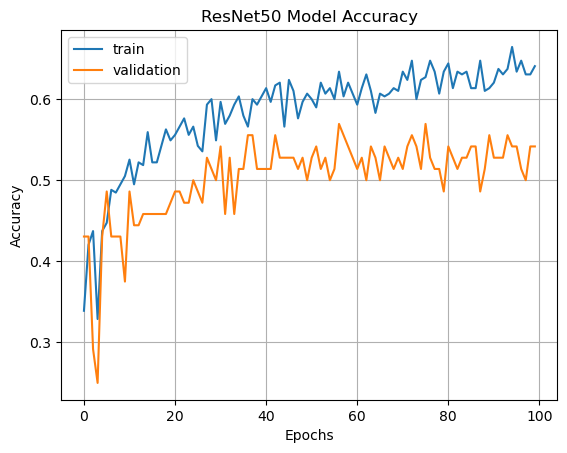

In [12]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.grid()
plt.title('ResNet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

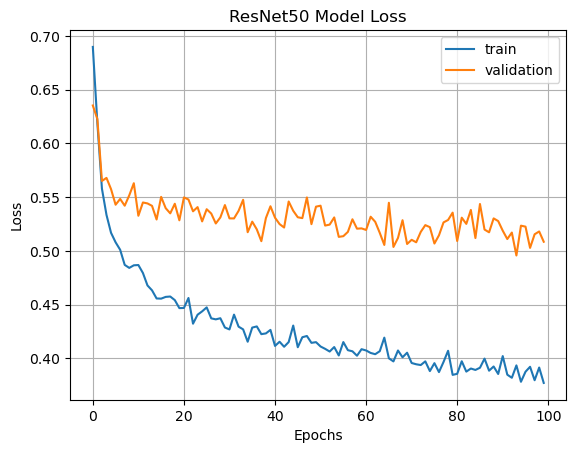

In [13]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.grid()
plt.title('ResNet50 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

### 6. Loading the Saved Model

In [14]:
# Insert code here

### 7. Preparing the Test Data

In [15]:
# Insert code here

### 8. Creating the test generator

In [16]:
# Insert code here

### 9. Prediction of Test Data

In [17]:
# Insert code here

### 10. Use np.argmax to get the max value from array as the predicted answer

In [18]:
# Insert code here

### 11. Use train class indices for mapping

In [19]:
# Insert code here

### 12. View the amount of predicted image in category assigned

In [20]:
# Insert code here

### 13. View Predicted Result with Images

In [21]:
# Insert code here